## k-means for tree clustering 

#### Based on https://mubaris.com/posts/kmeans-clustering/

In [15]:
# Some settings
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (25, 25)
plt.style.use('ggplot')

In [2]:
# Importing the dataset

#data = pd.read_csv('EPFL_littleforest_south.csv')
data = pd.read_csv('EPFL_points.csv')
#data = pd.read_csv('EPFL_trees_LESO.csv')
print(data.shape)
data.head()

(279917, 10)


,OBJECTID,pointid,grid_code,POINT_X,POINT_Y,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,611,61434,3.0,533081.25,153213.75,NaN,NaN,NaN,NaN,NaN
1,612,61435,3.0,533081.75,153213.75,NaN,NaN,NaN,NaN,NaN
2,782,63765,3.0,533080.25,153212.25,NaN,NaN,NaN,NaN,NaN
3,837,64547,3.0,533075.25,153211.75,NaN,NaN,NaN,NaN,NaN
4,840,64550,3.0,533077.25,153211.75,NaN,NaN,NaN,NaN,NaN


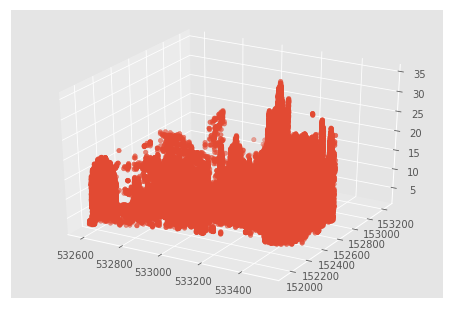

In [3]:
# Getting the values and plotting it
f1 = data['POINT_X'].values
f2 = data['POINT_Y'].values
#f3_b=data['grid_code'].where()
f3 = data['grid_code'].values
X = np.array(list(zip(f1, f2,f3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [6]:
# Optimization of stand density index

# vegetation density index vector to find the optimal one
trees_SSE=[]
stand_index=[10,40,50,70]
#stand_index=[10,50,70,150] #n trees/hectars

for i in stand_index:
    # Initializing KMeans
    kmeans = KMeans(n_clusters=int(len(data['POINT_X'])*0.25/10000*i))
    # Fitting with inputs
    kmeans = kmeans.fit(X)
    # Predicting the clusters
    labels = kmeans.predict(X)
    # Getting the cluster centers
    C = kmeans.cluster_centers_
    #reporting 
    trees_SSE.append(kmeans.inertia_)
print(trees_SSE)

[185593087.9050728, 37061017.5818846, 29082411.413221143, 19853431.548264027]


In [7]:
stand_index=[80,100]
#stand_index=[10,50,70,150] #n trees/hectars

for i in stand_index:
    # Initializing KMeans
    kmeans = KMeans(n_clusters=int(len(data['POINT_X'])*0.25/10000*i))
    # Fitting with inputs
    kmeans = kmeans.fit(X)
    # Predicting the clusters
    labels = kmeans.predict(X)
    # Getting the cluster centers
    C = kmeans.cluster_centers_
    #reporting 
    trees_SSE.append(kmeans.inertia_)
print(trees_SSE)

[185593087.9050728, 37061017.5818846, 29082411.413221143, 19853431.548264027, 17085468.91203526, 13271541.64982207]


In [8]:
stand_index=[150]
#stand_index=[10,50,70,150] #n trees/hectars

for i in stand_index:
    # Initializing KMeans
    kmeans = KMeans(n_clusters=int(len(data['POINT_X'])*0.25/10000*i))
    # Fitting with inputs
    kmeans = kmeans.fit(X)
    # Predicting the clusters
    labels = kmeans.predict(X)
    # Getting the cluster centers
    C = kmeans.cluster_centers_
    #reporting 
    trees_SSE.append(kmeans.inertia_)
print(trees_SSE)

[185593087.9050728, 37061017.5818846, 29082411.413221143, 19853431.548264027, 17085468.91203526, 13271541.64982207, 8528765.089482594]


In [ ]:
stand_index=[170]
#stand_index=[10,50,70,150] #n trees/hectars

for i in stand_index:
    # Initializing KMeans
    kmeans = KMeans(n_clusters=int(len(data['POINT_X'])*0.25/10000*i))
    # Fitting with inputs
    kmeans = kmeans.fit(X)
    # Predicting the clusters
    labels = kmeans.predict(X)
    # Getting the cluster centers
    C = kmeans.cluster_centers_
    #reporting 
    trees_SSE.append(kmeans.inertia_)
print(trees_SSE)

In [5]:
#print(trees_SSE)
fig = plt.figure()
plt.scatter(stand_index, trees_SSE)

NameError: name 'stand_index' is not defined

<Figure size 432x288 with 0 Axes>

# fixed stand density index

In [10]:
# Initializing KMeans
kmeans = KMeans(n_clusters=int(len(data['POINT_X'])*0.25/10000*82))
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [11]:
kmeans.n_clusters
# appunto
# dist(x.kmeans.cluster_centers_)
#transform, inertia_

573

In [18]:
print(len(C))
print(len(labels)

SyntaxError: unexpected EOF while parsing (<ipython-input-18-f7103a6b2b6e>, line 2)

In [ ]:
print(X[:, 2])

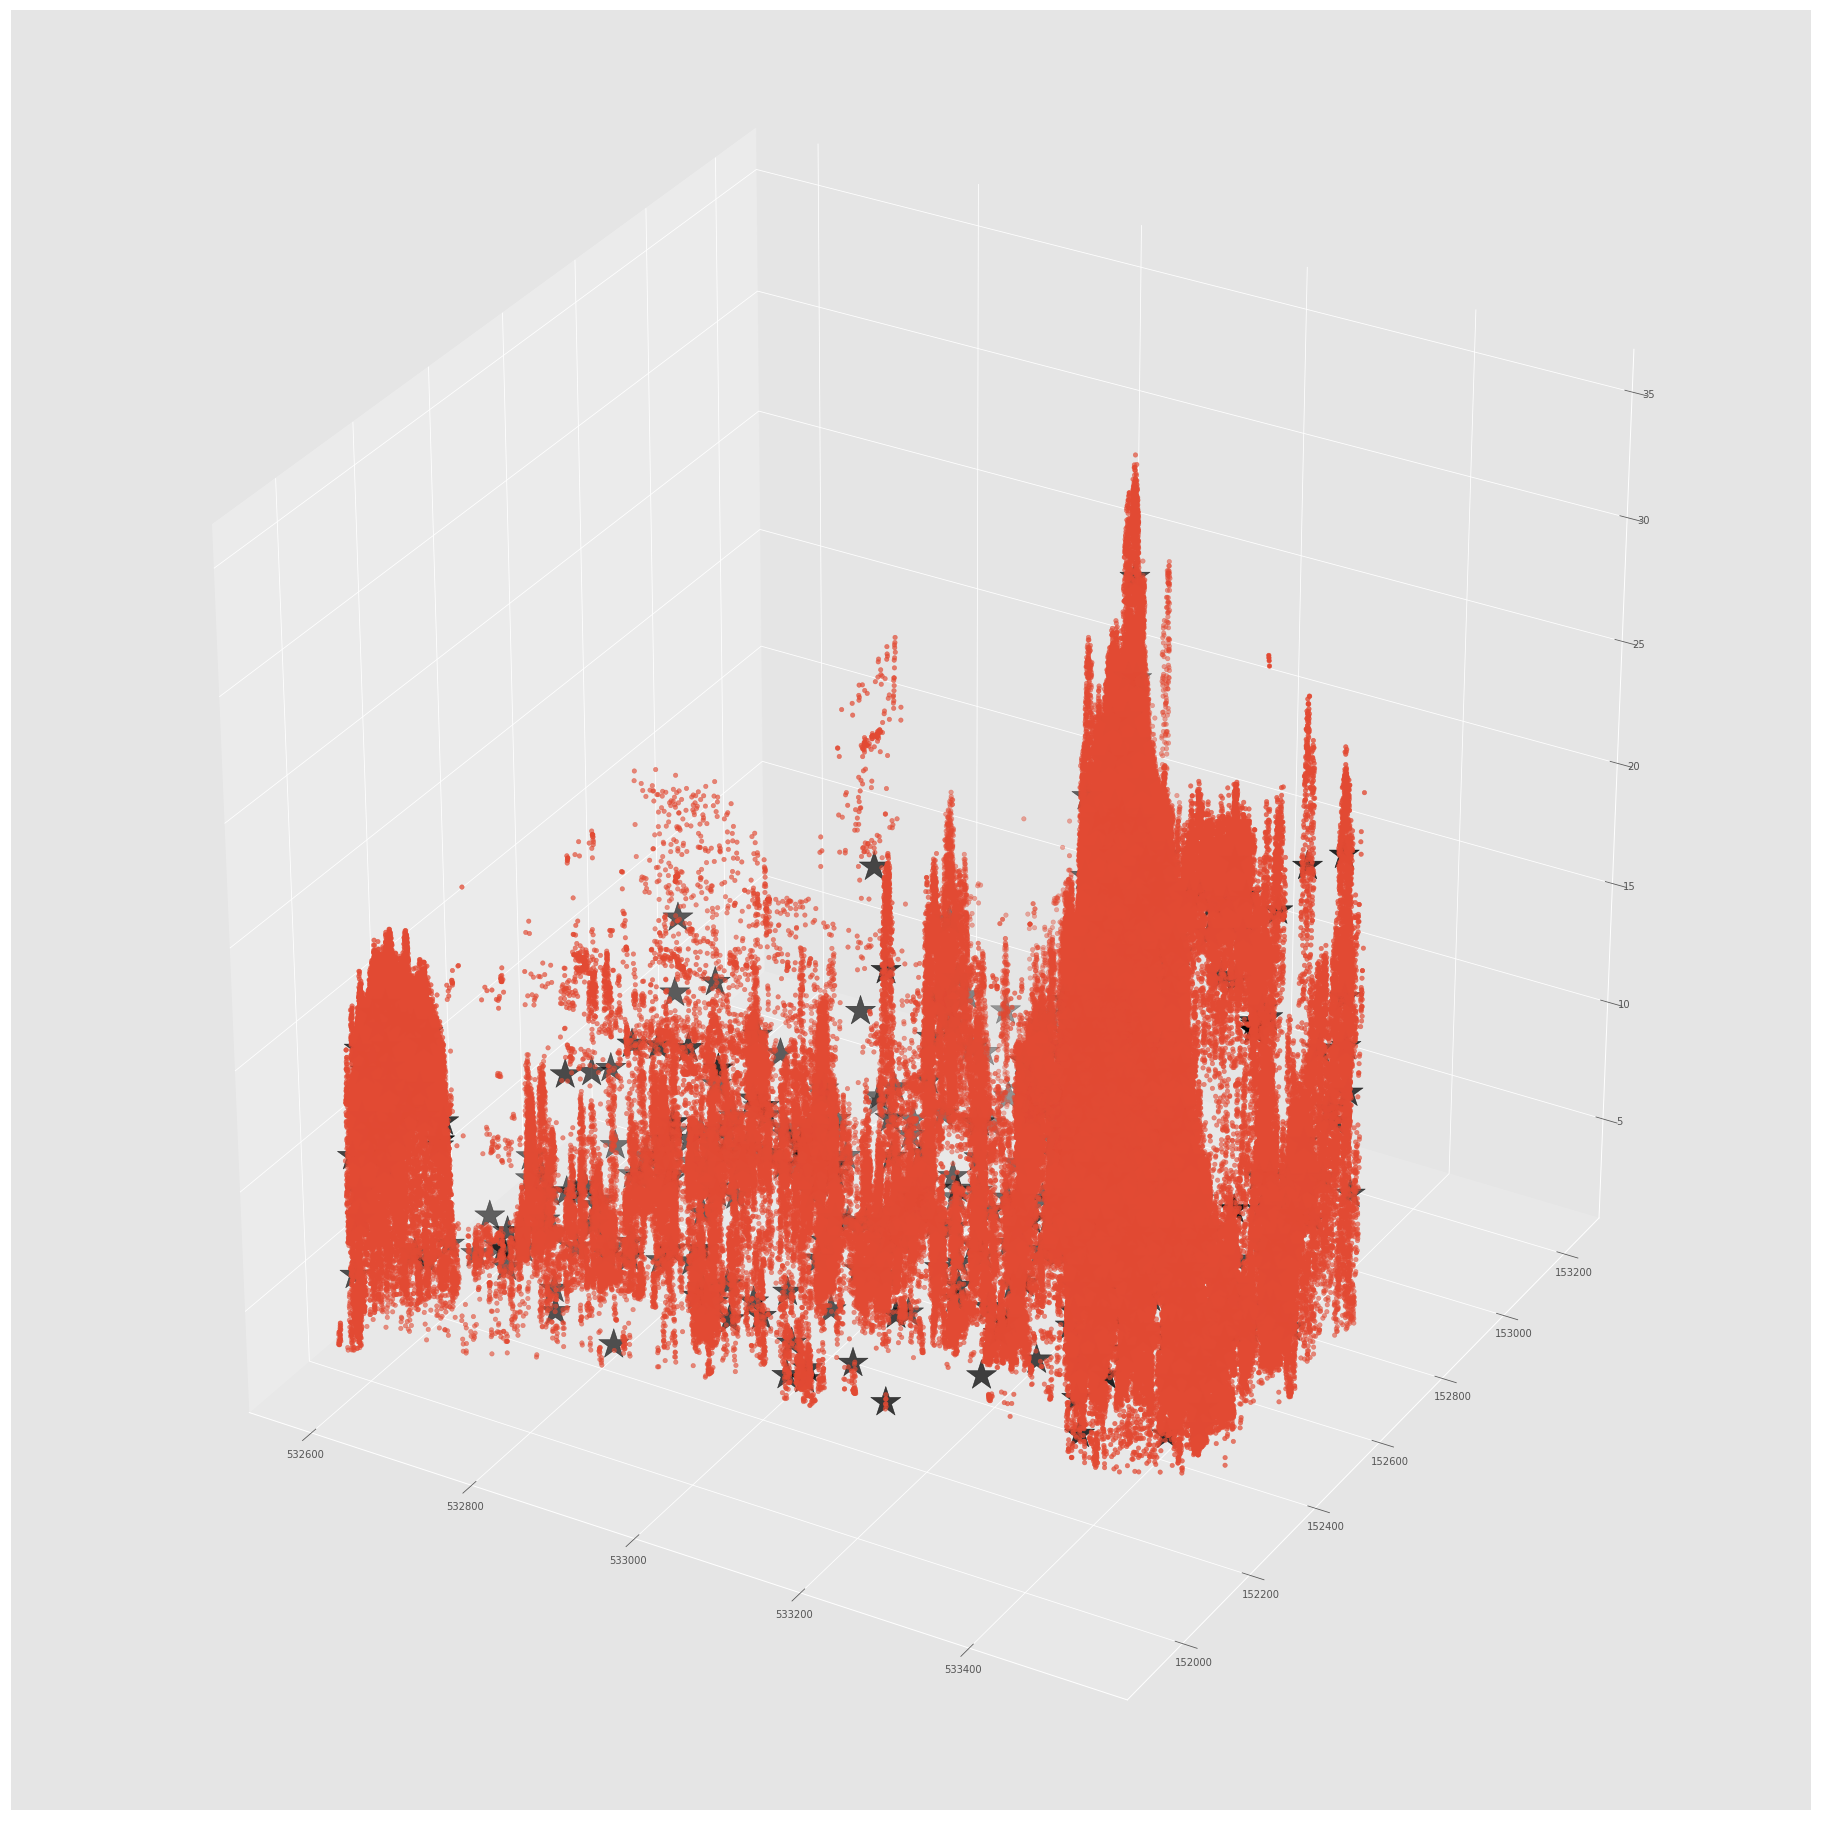

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*',c='#050505',s=1000)

#### Title

In [12]:
area=np.zeros(kmeans.n_clusters)
heights=np.zeros(kmeans.n_clusters)
for i in range(kmeans.n_clusters):
    #print(i)
    x=np.where(labels == i)
    #print(x[0].size)
    #print(x[0])
    #print(X[x, 2][0])
    heights[i]=np.amax(X[x, 2])
    area[i]=(x[0].size)*0.25 ## already in m2
    #diameter
print(heights)

#area.tofile('Centroids_area.csv',sep=' ',format='%.2f')
#heights.tofile('Max_heights.csv',sep=' ',format='%.2f')
#print(area)

[25.1  6.5 12.3 19.8 16.4 19.2 17.5 15.6 21.8  9.5 24.2 16.6 10.6  3.9
 11.6 20.1 14.6  5.3 13.6 26.4 20.3 17.  20.1 11.9 11.7 22.  19.4 11.7
 15.8 15.6 13.2 18.4 12.7 19.1 10.  12.9 17.  18.6 12.1 18.8 12.7 10.8
 20.8 12.7 26.  20.  18.9 11.2 11.9 13.5 17.3 11.  22.5 19.  16.8 23.7
 15.  10.8 10.3 11.2  9.2  8.8 18.5 15.6 15.5 21.2  8.  16.5 14.6 17.7
  9.1 15.5 26.4 17.  17.1 17.4 18.   9.7 16.7 19.9  8.7  9.1 18.5 10.8
 10.2 17.4 23.4 19.6 18.2 24.9  7.4 15.8 14.2 12.1 12.6 11.9 20.4 17.9
 20.2 12.4 12.2  8.4  9.4 16.  10.8 16.6 18.  13.   4.8 17.1 18.5 17.
 11.1 18.  12.4 15.3  7.6 12.   8.2  7.7 11.6  8.1 19.7 10.9 20.6 15.9
  7.1 19.5  7.5 11.7  8.4 24.5  8.4 19.2 15.6 16.7  7.6 25.8 14.1  8.6
 11.8 14.9 18.4 11.9 15.8 10.1 17.  14.  25.7 23.4 10.8 22.1  6.6  7.9
 17.6 13.6 15.9  8.4 16.7 12.1 18.  23.6 17.8  5.1 19.1 17.2 21.8 23.
  5.7 15.3 19.4 14.2 31.2 16.5 18.   9.8 18.3 15.8 18.7 15.8 12.  18.4
 29.1 18.  15.4 14.9 11.9  9.7 17.2 19.9 14.8 16.2 26.  10.8 12.1  8.4
 16.  13

In [13]:
# output file of trees: X, Y, Z, max_Z, area

h1 = C[:,0]
h2 = C[:,1]
h3 = C[:,2]
h4 = heights
h5 = area

total_trees = np.array(list(zip(h1,h2,h3,h4,h5)))

dataframe = pd.DataFrame(total_trees)
dataframe.to_csv('EPFL_total.csv', sep=' ', header=False, float_format='%.2f', index=False)

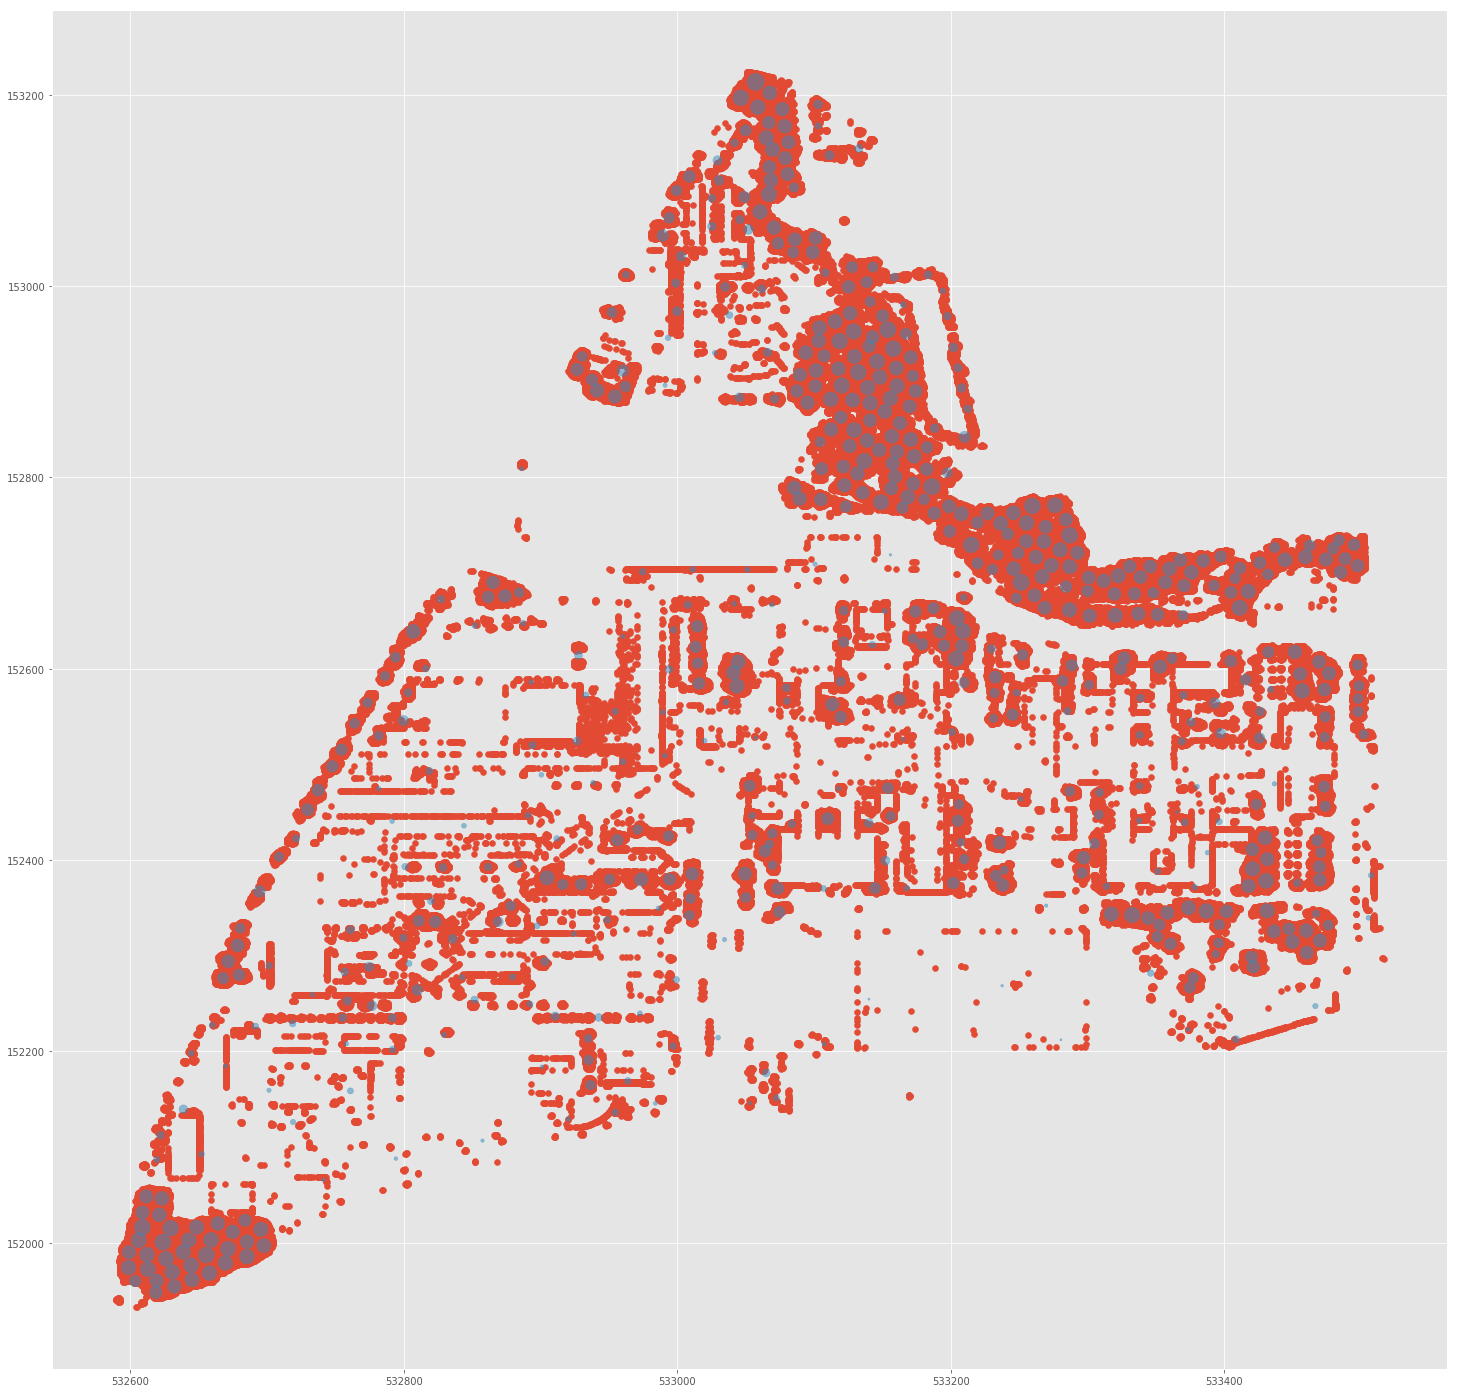

In [17]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1])
#plt.scatter(C[:, 0], C[:, 1],marker='*',s=1000)
#colors = C[:, 2]
#area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(50)
plt.scatter(C[:, 0], C[:, 1], s=area, alpha=0.5)
#plt.scatter(C[:, 0], C[:, 1], s=1000, alpha=0.5)